<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

## 1. HILL DESCENT AND HILL ASCENT

In [3]:
## Hill Descent and Hill ascent
import sympy as sp

x = sp.Symbol('x')
f = (x**2)+ 50
df = f.diff(x)
f

x**2 + 50

In [4]:
f = sp.lambdify(x, f)
df = sp.lambdify(x, df)

In [5]:
x1 = np.linspace(-50,50)

dervi_f = df(x1[10])
x_initial = x1[10]
eta = 0.01
alpha = 0.1

while abs(dervi_f) > eta:
    x_initial = x_initial - (alpha * dervi_f)
    dervi_f = df(x_initial)
print("Minima is",x_initial)

Minima is -0.0049167872293064485


In [6]:
x = sp.Symbol('x')
f = -((x**2)+ 50)
df = f.diff(x)

f = sp.lambdify(x, f)
df = sp.lambdify(x, df)

x1 = np.linspace(-50,50)

dervi_f = df(x1[10])
x_initial = x1[10]
eta = 0.01
alpha = 0.1

while abs(dervi_f) > eta:
    x_initial = x_initial + (alpha * dervi_f)
    dervi_f = df(x_initial)
print("MAxima is",x_initial)

MAxima is -0.0049167872293064485


## 2.FIND COEFFICIENTS OF OLS REGRESSION USING FORMULAE AND VERIFY USING ANY PACKAGE : CARS DATA : X=log(Weight),y=MPG

In [7]:
## 2. Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def SimpleLinearequ(x,y):
    b0 = 0
    b1 = 0
    n = len(x) 
    b0 = (np.sum(x**2)*np.sum(y) - (np.sum(x)*(np.sum(x*y)))) / ((n * np.sum(x**2)) - (np.sum(x))**2)
    
    b1 = ((n*np.sum(x*y) - (np.sum(x)*np.sum(y)))/((n * np.sum(x**2)) - (np.sum(x))**2) )
    
    return b0, b1


In [16]:
cars = pd.read_csv("cars.csv")
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


Text(0.5, 1.0, 'Simple Linear Regression')

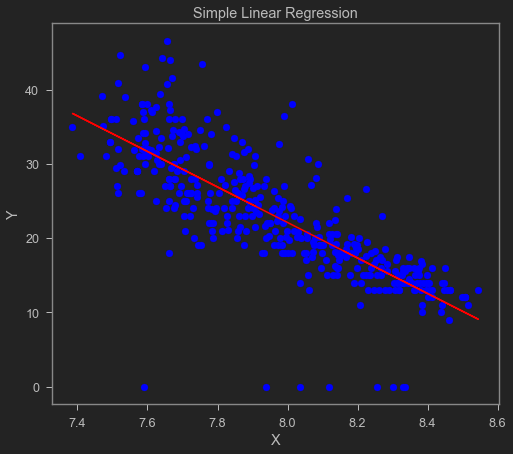

In [19]:
x = np.log(cars["Weight"])
y = cars["MPG"]
#fitting the model
b0,b1= SimpleLinearequ(x,y)

#prediction
y_hat = b0 + b1*x

#plotting
plt.scatter(x, y, color="Blue")
plt.plot(x, y_hat, color= "Red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")

## 3.CALCULATE EUCLIDEAN DISTANCE IN VECTORIZED FORM 

In [38]:
## euclidean distance

x = np.array([1,2,3,4,5])
y = np.array([1,2,3,5,9])

diff = x-y
euc = np.sqrt(np.matmul(np.transpose(diff),diff))
euc

4.123105625617661

## 4. CALCULATE COEFFICIENTS OF LR USING THE FORMULA

In [52]:
# Closed form
import statsmodels.api as sm

cars = pd.read_csv("cars.csv")
cars.head()
x = cars.iloc[:,[4,5,6]]
y = cars.iloc[:,[1]]
H = sm.add_constant(x)

#covert to matrix
H = np.matrix(H)
y = np.matrix(y)

#1st matrix Ht * H
HtH = np.matmul(np.transpose(H),H)

#2nd matrix inverse of Ht * H
I_HtH = np.linalg.inv(HtH)

#3rd matrix, multiply it with Ht
I_HtH_Ht = np.matmul(I_HtH,np.transpose(H))

#b
b = np.matmul(I_HtH_Ht,y)
b

matrix([[ 4.37593802e+01],
        [-3.82192157e-02],
        [-6.13436732e-03],
        [ 9.82936468e-02]])